In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv("Airline_Delay_Cause.csv")
print(df.head())

   year  month carrier       carrier_name airport  \
0  2022     11      9E  Endeavor Air Inc.     ABY   
1  2022     11      9E  Endeavor Air Inc.     AEX   
2  2022     11      9E  Endeavor Air Inc.     AGS   
3  2022     11      9E  Endeavor Air Inc.     ALB   
4  2022     11      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0             Albany, GA: Southwest Georgia Regional         86.0        2.0   
1           Alexandria, LA: Alexandria International         59.0        5.0   
2        Augusta, GA: Augusta Regional at Bush Field         21.0        1.0   
3                   Albany, NY: Albany International         98.0       15.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       1143.0      114.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        0.00        0.74  ...          0.0              0.00            0.0   
1        1.77        0.00  ...          

num airlines: 17
mean delay per flight: 0.18416570559141937


{'whiskers': [<matplotlib.lines.Line2D at 0x20a2c5b5090>,
 'caps': [<matplotlib.lines.Line2D at 0x20a2c5b5540>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a2c5b4df0>],
 'medians': [<matplotlib.lines.Line2D at 0x20a2c5b5a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a2c5b5d20>],
 'means': []}

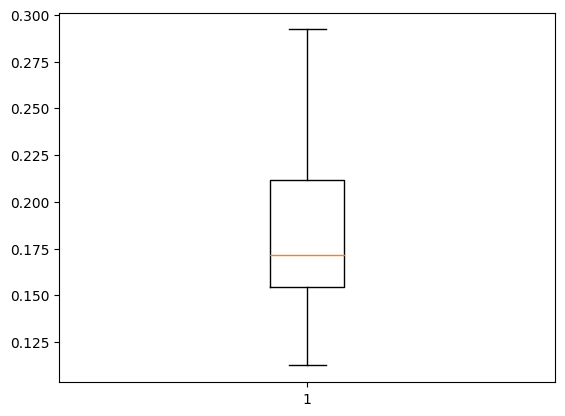

In [39]:
#number of delays per airline per flight  
groupbyCarrier = df.groupby("carrier_name")
# print(grouped.head())
a = groupbyCarrier[["arr_flights", "arr_del15"]].sum()
a["delay/flight"] = a["arr_del15"]/a["arr_flights"]

delay_per_flight = a["delay/flight"]
# print(delay_per_flight)
print("num airlines:",len(delay_per_flight))
print("mean delay per flight:", np.mean(delay_per_flight))

plt.boxplot(delay_per_flight)


In [24]:
#conf interval
interval = st.t.interval(alpha=0.95,
              df=len(delay_per_flight)-1,
              loc=np.mean(delay_per_flight), 
              scale=st.sem(delay_per_flight))
print(interval)

a["extreme"] = a.apply(lambda x: (x["delay/flight"] < interval[0]) or (x["delay/flight"] > interval[1]), axis=1)
print(a)

(0.15812467358306861, 0.21020673759977013)
                        arr_flights  arr_del15  delay/flight  extreme
carrier_name                                                         
Alaska Airlines Inc.       419034.0    71979.0      0.171774    False
Allegiant Air              236640.0    69153.0      0.292229     True
American Airlines Inc.    1611371.0   302822.0      0.187928    False
Delta Air Lines Inc.      1664052.0   221700.0      0.133229     True
Endeavor Air Inc.          525074.0    59092.0      0.112540     True
Envoy Air                  517640.0    80131.0      0.154801     True
Frontier Airlines Inc.     293474.0    73819.0      0.251535     True
Hawaiian Airlines Inc.     133818.0    20646.0      0.154284     True
Horizon Air                194866.0    27006.0      0.138588     True
JetBlue Airways            473580.0   131449.0      0.277565     True
Mesa Airlines Inc.         289256.0    54201.0      0.187381    False
PSA Airlines Inc.          450868.0    72117.0 

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_2936\128280788.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  interval = st.t.interval(alpha=0.95,


In [ ]:
#amount of delay (min) per airline per flight

num airlines: 340
mean delay per flight: 0.16913923324037097


{'whiskers': [<matplotlib.lines.Line2D at 0x20a2cb23ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x20a2cb4c040>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a2cb23820>],
 'medians': [<matplotlib.lines.Line2D at 0x20a2cb4c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a2cb4c820>],
 'means': []}

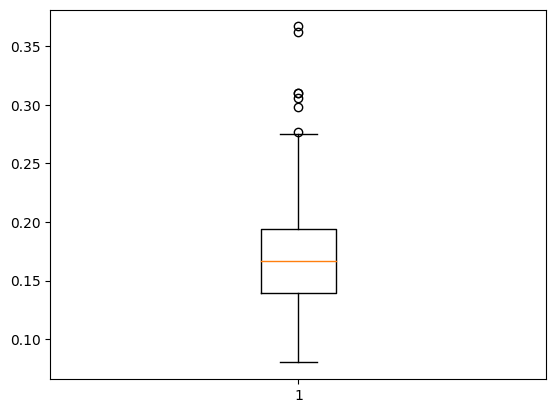

In [50]:
#number of delays per airport
groupbyAirport = df.groupby("airport_name")
b = groupbyAirport[["arr_flights", "arr_del15"]].sum()
b["delay/flight"] = b["arr_del15"]/b["arr_flights"]
b = b[b["arr_flights"] > 1000]

delay_per_flight_aiport = b["delay/flight"]
# print(delay_per_flight)
print("num airlines:",len(delay_per_flight_aiport))
print("mean delay per flight:", np.mean(delay_per_flight_aiport))

plt.boxplot(delay_per_flight_aiport)

In [51]:
#conf interval

interval_airports = st.t.interval(alpha=0.95,
              df=len(delay_per_flight_aiport)-1,
              loc=np.mean(delay_per_flight_aiport), 
              scale=st.sem(delay_per_flight_aiport))
print(interval_airports)

b["extreme"] = b.apply(lambda x: (x["delay/flight"] < interval_airports[0]) or (x["delay/flight"] > interval_airports[1]), axis=1)

print(len(b))
print(len(b[b["extreme"]]))
b = b.sort_values(by=['delay/flight'], ascending=False)
print(b.head())

(0.16453960020490352, 0.17373886627583843)
340
307
                                                    arr_flights  arr_del15  \
airport_name                                                                 
Punta Gorda, FL: Punta Gorda Airport                    12495.0     4585.0   
Aguadilla, PR: Rafael Hernandez                          3721.0     1348.0   
St. Petersburg, FL: St Pete Clearwater Internat...      15867.0     4927.0   
Sanford, FL: Orlando Sanford International              19333.0     5990.0   
Phoenix, AZ: Phoenix - Mesa Gateway                     12087.0     3699.0   

                                                    delay/flight  extreme  
airport_name                                                               
Punta Gorda, FL: Punta Gorda Airport                    0.366947     True  
Aguadilla, PR: Rafael Hernandez                         0.362268     True  
St. Petersburg, FL: St Pete Clearwater Internat...      0.310519     True  
Sanford, FL: Orlando S

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_2936\3177789928.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  interval_airports = st.t.interval(alpha=0.95,
